In [1]:
%load_ext autoreload 
%autoreload 2
import cv2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist

import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')
#sys.path.append(r'C:\Users\nlab\Documents\GitHub\obstacle_avoidance\plots') # go to parent dir 

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots.plots import plot_oa
#from plots.plots import *
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
c:\Users\nlab\anaconda3\envs\ephys0\lib\site-packages\deeplabcut\__init__.py:78: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  warnings.warn(


In [ ]:
"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_oa_09_08_07.json"

In [3]:
session = plot_oa(r"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_oa_09_08_07.json",'blank')
session.gather_session_df('obstacle',6)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\obstacle_avoidance\\recordings\\090923\\G8CK1RT'

In [56]:
df = session.df
#df[df['condition']=='whtewhite']['condition'] = df[df['condition']=='whtewhite']['condition'] ='whitewhite'
df.loc[df['condition'] == 'whtewhite', 'condition'] = 'whitewhite'



In [53]:
df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,45673.239641,45675.615641,"[45673.264243, 45673.296153, 45673.324608, 456...","[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5...","[nan, nan, nan, nan, nan, nan, nan, 317.613494...","[nan, nan, nan, nan, nan, nan, nan, 428.693664...","[nan, nan, nan, nan, nan, nan, 289.67123413085...","[nan, nan, nan, nan, nan, nan, 457.53485107421...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,45675.615641,45677.426137,"[45675.61806, 45675.647296, 45675.678988, 4567...","[[120, 121, 122, 123, 124, 125, 126, 127, 128,...","[659.3033447265625, 660.028564453125, 660.9074...","[265.2336120605469, 264.23797607421875, 264.71...","[645.468994140625, 646.9461059570312, 648.6363...","[253.5147705078125, 254.06600952148438, 253.84...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,7,45694.786227,45696.019507,"[45694.799948, 45694.829734, 45694.859558, 456...","[[764, 765, 766, 767, 768, 769, 770, 771, 772,...","[659.0716552734375, 660.1904907226562, 660.555...","[261.5389404296875, 261.0389404296875, 260.780...","[647.6511840820312, 649.55419921875, 649.76049...","[248.69761657714844, 248.4850311279297, 248.30...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,10,45702.253939,45706.145664,"[45702.275507, 45702.306022, 45702.337433, 457...","[1015, 1016, 1017, 1018, 1019, 1020, 1021, 102...","[80.62640380859375, 78.74076080322266, 77.3976...","[255.758056640625, 256.96710205078125, 257.992...","[99.04127502441406, 95.46072387695312, 92.0319...","[250.452880859375, 251.7390899658203, 254.9488...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,12,45707.841472,45711.376550,"[45707.846016, 45707.875852, 45707.905638, 457...","[1202, 1203, 1204, 1205, 1206, 1207, 1208, 120...","[83.60132598876953, 82.26795959472656, 81.9206...","[259.0328674316406, 259.73956298828125, 259.41...","[91.72212219238281, 90.09596252441406, 88.3129...","[257.0889587402344, 258.13690185546875, 258.06...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35527,117,121,41656.259571,41658.328268,"[41656.262784, 41656.279372, 41656.296921, 416...","[[17323, 17324, 17325, 17326, 17327, 17328, 17...","[663.495849609375, 664.8201904296875, 665.9396...","[264.89837646484375, 265.54156494140625, 265.8...","[655.5112915039062, 656.9105224609375, 658.145...","[251.44400024414062, 252.0143280029297, 251.90...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35528,118,122,41658.328268,41661.498713,"[41658.330163, 41658.347379, 41658.363673, 416...","[17447, 17448, 17449, 17450, 17451, 17452, 174...","[79.43203735351562, 78.3126449584961, 77.73419...","[253.1162109375, 253.1206817626953, 252.876266...","[98.80210876464844, 97.23664093017578, 96.3384...","[248.8653106689453, 249.73953247070312, 249.97...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35529,119,123,41661.498713,41663.505932,"[41661.514457, 41661.531404, 41661.548057, 416...","[[17638, 17639, 17640, 17641, 17642, 17643, 17...","[665.4390869140625, 665.7069091796875, 664.964...","[265.40057373046875, 265.3721618652344, 265.77...","[656.1515502929688, 656.332763671875, 656.9799...","[251.6207275390625, 251.34507751464844, 251.37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35530,120,124,41663.505932,41665.877888,"[41663.515033, 41663.532787, 41663.548774, 416...","[17758, 17759, 17760, 17761, 17762, 17763, 177...","[79.8014144897461, 79.39984893798828, 79.16961...","[255.52340698242188, 255.8111572265625, 256.64...","[96.87207794189453, 95.72206115722656, 96.0115...","[252.80593872070312, 252.98394775390625, 252.9...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'whitewhite'),
  Text(1, 0, 'blackblack'),
  Text(2, 0, 'blacknoise'),
  Text(3, 0, 'whiteblack'),
  Text(4, 0, 'whitenoise'),
  Text(5, 0, 'blackwhite'),
  Text(6, 0, 'noisewhite'),
  Text(7, 0, 'noisenoise'),
  Text(8, 0, 'noiseblack')])

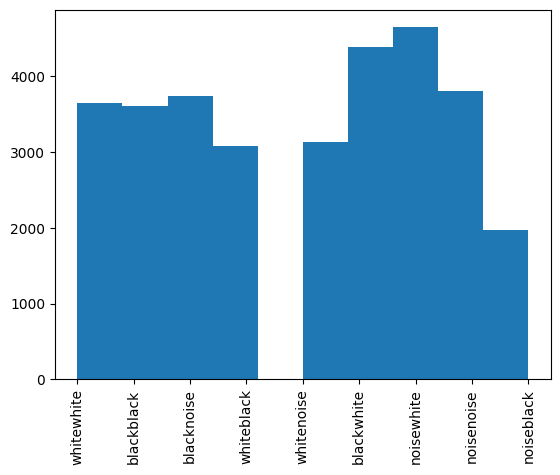

In [57]:
plt.hist(df['condition'])
plt.xticks(rotation=90)

In [66]:
df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,45673.239641,45675.615641,"[45673.264243, 45673.296153, 45673.324608, 456...","[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5...","[nan, nan, nan, nan, nan, nan, nan, 317.613494...","[nan, nan, nan, nan, nan, nan, nan, 428.693664...","[nan, nan, nan, nan, nan, nan, 289.67123413085...","[nan, nan, nan, nan, nan, nan, 457.53485107421...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,45675.615641,45677.426137,"[45675.61806, 45675.647296, 45675.678988, 4567...","[[120, 121, 122, 123, 124, 125, 126, 127, 128,...","[659.3033447265625, 660.028564453125, 660.9074...","[265.2336120605469, 264.23797607421875, 264.71...","[645.468994140625, 646.9461059570312, 648.6363...","[253.5147705078125, 254.06600952148438, 253.84...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,7,45694.786227,45696.019507,"[45694.799948, 45694.829734, 45694.859558, 456...","[[764, 765, 766, 767, 768, 769, 770, 771, 772,...","[659.0716552734375, 660.1904907226562, 660.555...","[261.5389404296875, 261.0389404296875, 260.780...","[647.6511840820312, 649.55419921875, 649.76049...","[248.69761657714844, 248.4850311279297, 248.30...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,10,45702.253939,45706.145664,"[45702.275507, 45702.306022, 45702.337433, 457...","[1015, 1016, 1017, 1018, 1019, 1020, 1021, 102...","[80.62640380859375, 78.74076080322266, 77.3976...","[255.758056640625, 256.96710205078125, 257.992...","[99.04127502441406, 95.46072387695312, 92.0319...","[250.452880859375, 251.7390899658203, 254.9488...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,12,45707.841472,45711.376550,"[45707.846016, 45707.875852, 45707.905638, 457...","[1202, 1203, 1204, 1205, 1206, 1207, 1208, 120...","[83.60132598876953, 82.26795959472656, 81.9206...","[259.0328674316406, 259.73956298828125, 259.41...","[91.72212219238281, 90.09596252441406, 88.3129...","[257.0889587402344, 258.13690185546875, 258.06...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35527,117,121,41656.259571,41658.328268,"[41656.262784, 41656.279372, 41656.296921, 416...","[[17323, 17324, 17325, 17326, 17327, 17328, 17...","[663.495849609375, 664.8201904296875, 665.9396...","[264.89837646484375, 265.54156494140625, 265.8...","[655.5112915039062, 656.9105224609375, 658.145...","[251.44400024414062, 252.0143280029297, 251.90...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35528,118,122,41658.328268,41661.498713,"[41658.330163, 41658.347379, 41658.363673, 416...","[17447, 17448, 17449, 17450, 17451, 17452, 174...","[79.43203735351562, 78.3126449584961, 77.73419...","[253.1162109375, 253.1206817626953, 252.876266...","[98.80210876464844, 97.23664093017578, 96.3384...","[248.8653106689453, 249.73953247070312, 249.97...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35529,119,123,41661.498713,41663.505932,"[41661.514457, 41661.531404, 41661.548057, 416...","[[17638, 17639, 17640, 17641, 17642, 17643, 17...","[665.4390869140625, 665.7069091796875, 664.964...","[265.40057373046875, 265.3721618652344, 265.77...","[656.1515502929688, 656.332763671875, 656.9799...","[251.6207275390625, 251.34507751464844, 251.37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35530,120,124,41663.505932,41665.877888,"[41663.515033, 41663.532787, 41663.548774, 416...","[17758, 17759, 17760, 17761, 17762, 17763, 177...","[79.8014144897461, 79.39984893798828, 79.16961...","[255.52340698242188, 255.8111572265625, 256.64...","[96.87207794189453, 95.72206115722656, 96.0115...","[252.80593872070312, 252.98394775390625, 252.9...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [43]:
df['condition'].unique()

array(['whitewhite', 'blackblack', 'blacknoise', 'whiteblack',
       'whitenoise', 'blackwhite', 'noisewhite', 'noisenoise',
       'noiseblack'], dtype=object)

In [65]:
ww_df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm,condition_mean_interp_ts_nose_y_cm,condition_median_interp_ts_nose_y_cm,condition_std_interp_ts_nose_y_cm,condition_mad_interp_ts_nose_y_cm
0,0,0,45673.239641,45675.615641,"[45673.264243, 45673.296153, 45673.324608, 456...","[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5...","[nan, nan, nan, nan, nan, nan, nan, 317.613494...","[nan, nan, nan, nan, nan, nan, nan, 428.693664...","[nan, nan, nan, nan, nan, nan, 289.67123413085...","[nan, nan, nan, nan, nan, nan, 457.53485107421...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[20.87215730083216, 21.18866150702269, 21.5159...","[20.648516495681797, 20.997829153624274, 21.40...","[2.168620888100089, 2.121288309112802, 2.07125...","[0.49973392035070674, 0.5134304104126279, 0.61..."
1,1,1,45675.615641,45677.426137,"[45675.61806, 45675.647296, 45675.678988, 4567...","[[120, 121, 122, 123, 124, 125, 126, 127, 128,...","[659.3033447265625, 660.028564453125, 660.9074...","[265.2336120605469, 264.23797607421875, 264.71...","[645.468994140625, 646.9461059570312, 648.6363...","[253.5147705078125, 254.06600952148438, 253.84...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[19.83555769617368, 20.039116586677956, 20.257...","[19.81315871776033, 19.98859601621225, 20.2098...","[0.9212054578876676, 0.9883685685092558, 1.051...","[0.4639417318746606, 0.46959259667752207, 0.48..."
3,4,7,45694.786227,45696.019507,"[45694.799948, 45694.829734, 45694.859558, 456...","[[764, 765, 766, 767, 768, 769, 770, 771, 772,...","[659.0716552734375, 660.1904907226562, 660.555...","[261.5389404296875, 261.0389404296875, 260.780...","[647.6511840820312, 649.55419921875, 649.76049...","[248.69761657714844, 248.4850311279297, 248.30...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[16.11980069777479, 15.740309962183998, 15.391...","[16.141446162986277, 15.74651097907111, 15.402...","[0.9724628710125646, 1.0148181060800714, 1.047...","[0.5842045839016903, 0.6572336834106984, 0.667..."
4,6,10,45702.253939,45706.145664,"[45702.275507, 45702.306022, 45702.337433, 457...","[1015, 1016, 1017, 1018, 1019, 1020, 1021, 102...","[80.62640380859375, 78.74076080322266, 77.3976...","[255.758056640625, 256.96710205078125, 257.992...","[99.04127502441406, 95.46072387695312, 92.0319...","[250.452880859375, 251.7390899658203, 254.9488...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[23.131951206998824, 23.148020502295573, 23.15...","[23.17011695789094, 23.177872965333485, 23.177...","[1.4130493169750575, 1.4223593729016006, 1.426...","[1.030016807715338, 1.0422302715310003, 1.0422..."
6,8,12,45707.841472,45711.376550,"[45707.846016, 45707.875852, 45707.905638, 457...","[1202, 1203, 1204, 1205, 1206, 1207, 1208, 120...","[83.60132598876953, 82.26795959472656, 81.9206...","[259.0328674316406, 259.73956298828125, 259.41...","[91.72212219238281, 90.09596252441406, 88.3129...","[257.0889587402344, 258.13690185546875, 258.06...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[15.031071102057531, 15.031071102057531, 14.99...","[14.942500720870601, 14.942500720870601, 14.89...","[1.5379569709712473, 1.5379569709712473, 1.526...","[0.8025136613377537, 0.8025136613377537, 0.753..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29766,161,176,62087.924185,62089.862028,"[62087.936, 62087.95255, 62087.969408, 62087.9...","[24823, 24824, 24825, 24826, 24827, 24828, 248...","[74.29251861572266, 74.0696792602539, 73.91883...","[260.8953857421875, 261.7004699707031, 262.030...","[79.37791442871094, 79.04821014404297, 78.7963...","[267.826171875, 267.57574462890625, 267.804168...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[15.801244185294781, 15.800353065027023, 15.92...","[15.792716250765418, 15.792716250765418, 15.79...","[1.9733767597660852, 1.97390649911407, 2.03157...","[1.3082426864272776, 1.3082426864272776, 1.424..."

In [61]:
wn_df =  df[df['condition']=='whitenoise']
bn_df =  df[df['condition']=='blacknoise']
nn_df =  df[df['condition']=='noisenoise']

ww_df =  df[df['condition']=='whitewhite']
bw_df =  df[df['condition']=='blackwhite']
nw_df =  df[df['condition']=='noisewhite']

wb_df =  df[df['condition']=='whiteblack']
bb_df =  df[df['condition']=='blackblack']
nb_df =  df[df['condition']=='noiseblack']

In [62]:
get_mean_median_by_variable(wn_df,'condition')
by_start_obstalce_average_df_key(wn_df,'whitenoise','condition')

get_mean_median_by_variable(bn_df,'condition')
by_start_obstalce_average_df_key(bn_df,'blacknoise','condition')

get_mean_median_by_variable(nn_df,'condition')
by_start_obstalce_average_df_key(nn_df,'noisenoise','condition')

get_mean_median_by_variable(ww_df,'condition')
by_start_obstalce_average_df_key(ww_df,'whitewhite','condition')

get_mean_median_by_variable(bw_df,'condition')
by_start_obstalce_average_df_key(bw_df,'blackwhite','condition')

get_mean_median_by_variable(nw_df,'condition')
by_start_obstalce_average_df_key(nw_df,'noisewhite','condition')

get_mean_median_by_variable(wb_df,'condition')
by_start_obstalce_average_df_key(wb_df,'whiteblack','condition')

get_mean_median_by_variable(bb_df,'condition')
by_start_obstalce_average_df_key(bb_df,'blackblack','condition')

get_mean_median_by_variable(nb_df,'condition')
by_start_obstalce_average_df_key(nb_df,'noiseblack','condition')

In [63]:
get_mean_median_by_variable(nw_df,'condition')
by_start_obstalce_average_df_key(nw_df,'noisewhite2','condition')


In [13]:
len(df['trial_vidframes'][0])/60

2.933333333333333

In [18]:
len(df['nose_x_cm'][0])/60

2.933333333333333

In [15]:
len(df['nose_x'][0])

176

In [64]:
session.obstacle_by_variable('condition','dark','condition')    

In [16]:
df['speed']

KeyError: 'speed'

In [25]:
def calculate_speed(x_positions, y_positions, fps):
    # Calculate the change in positions between frames
    delta_x = np.diff(x_positions)
    delta_y = np.diff(y_positions)
    
    # Calculate the Euclidean distance between consecutive positions
    distance = np.sqrt(delta_x**2 + delta_y**2)
    
    # Calculate the time interval between frames
    time_interval = 1 / fps
    
    # Calculate the speed in cm/s
    speed = distance / time_interval
    
    return speed,distance

In [19]:
df['nose_x_cm'][0]

array([7.302035179904487, 7.306902300379573, 7.233455348108354,
       7.218527848205859, 7.143864257615208, 7.131306508248188,
       7.129792091319103, 7.141583557063953, 7.124021992660083,
       7.113123862744188, 7.033407678144439, 7.048669257287095,
       7.057703009507895, 7.049739558689785, 7.025936554627619,
       7.05576546335443, 7.07064531867938, 7.048657346142709,
       7.056155695132411, 7.0486238814989575, 7.002646864168757,
       7.072365061049786, 7.052914162267347, 7.009326747379931,
       7.039875996743422, 7.030125874267402, 7.011042519368876,
       7.003922491012769, 7.015822291451797, 7.02326165191692,
       7.012715751556442, 7.027521304028317, 7.032416217173637,
       7.012942630497129, 7.0251748085842625, 7.005945116768993,
       7.040594068590696, 7.061266710468735, 7.021865779234345,
       7.0465638207175205, 7.037211870782406, 7.038357042235523,
       7.05578871844585, 7.055954340072551, 7.047513876281647,
       7.067866051655965, 7.0637192718175

In [33]:
x_positions = df['ts_nose_x_cm'][0].astype(float)  # Replace with your x positions in cm
y_positions = df['ts_nose_y_cm'][0].astype(float)  # Replace with your y positions in cm
fps = 60  # Frames per second

speeds,distance = calculate_speed(x_positions, y_positions, fps)

In [ ]:
def speed(df,)

In [29]:
from scipy.ndimage import gaussian_filter1d, gaussian_filter

In [31]:
speeds

array([ 2.77701314,  7.06084211,  4.8661743 ,  5.95381309,  4.55958483,
        1.57299191,  1.10490145,  1.34232364,  3.86322292,  8.96648951,
        2.710586  ,  4.30484731,  3.3612904 ,  1.49675533,  2.23088467,
        1.63100041,  1.40707244,  0.52192405,  1.71221042,  2.89155334,
        4.31159103,  1.92386582,  2.97807215,  5.97346308,  2.66436945,
        1.1599914 ,  2.94320545,  1.67268666,  4.92005779,  5.81537925,
        4.55889815,  0.94289727,  2.98007488,  4.48567724,  2.10423876,
        4.56458394,  1.7742905 ,  2.91284036,  1.48202504,  1.8755688 ,
        3.4430064 ,  3.14951033,  0.97499483,  1.93031498,  1.35757737,
        1.59512998,  2.12047998,  0.85972191,  2.43013558,  1.97144285,
        0.82750327,  2.51134864,  3.56931819,  3.56347033,  0.47527213,
        0.81248098, 10.50212668,  8.42200542,  4.40714265,  0.4654163 ,
        1.94464893,  0.76026281,  9.41017594,  5.27190459,  3.43634116,
        1.03585275,  7.11092268,  2.73720405,  3.45850084,  1.37

In [30]:
 gaussian_filter1d(speeds,2)

array([ 4.77439682,  4.81461278,  4.73386389,  4.3848577 ,  3.80958375,
        3.2604154 ,  3.03913497,  3.25878213,  3.72653967,  4.08071703,
        4.06947862,  3.6984053 ,  3.1433305 ,  2.58480334,  2.12823407,
        1.82197391,  1.70220756,  1.79778107,  2.0867439 ,  2.47431919,
        2.84362175,  3.1174495 ,  3.25327981,  3.2259162 ,  3.07688696,
        2.952645  ,  3.01503841,  3.28601961,  3.60198274,  3.74865316,
        3.65415982,  3.43749132,  3.26088328,  3.16894737,  3.08921285,
        2.94626958,  2.74139412,  2.54291004,  2.41987465,  2.37411973,
        2.3328869 ,  2.22059311,  2.03697245,  1.8505595 ,  1.72566772,
        1.6765579 ,  1.68238418,  1.7220802 ,  1.79277224,  1.91022742,
        2.08883592,  2.31340189,  2.56533187,  2.9040354 ,  3.44948524,
        4.17741859,  4.77589713,  4.86565334,  4.41327855,  3.82518009,
        3.5747229 ,  3.77219903,  4.12811038,  4.30006146,  4.20533683,
        3.97718289,  3.72230681,  3.43920769,  3.13946588,  2.93

(array([97., 11.,  5., 13.,  6.,  5., 12.,  8., 12.,  6.]),
 array([ 1.6765579 ,  8.01613573, 14.35571356, 20.6952914 , 27.03486923,
        33.37444706, 39.7140249 , 46.05360273, 52.39318057, 58.7327584 ,
        65.07233623]),
 <BarContainer object of 10 artists>)

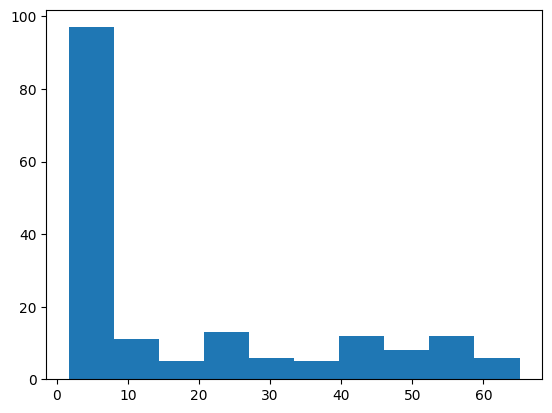

In [32]:
plt.hist(gaussian_filter1d(speeds,2))

In [ ]:
## trace colored by speed 


In [39]:
results

[False, False, False]

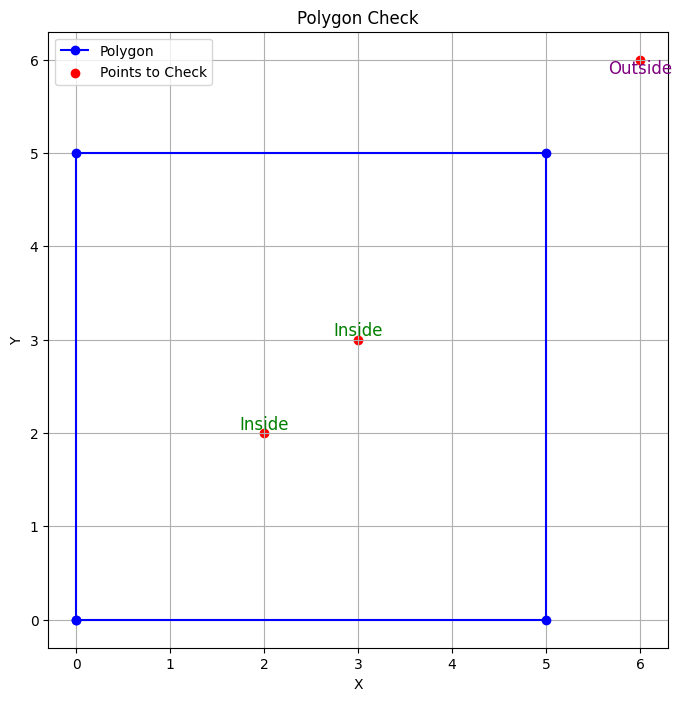

In [3]:
import matplotlib.pyplot as plt

def are_points_inside_polygon(x_points, y_points, polygon_x, polygon_y):
    n = len(polygon_x)
    results = []

    for x, y in zip(x_points, y_points):
        inside = False
        p1x, p1y = polygon_x[0], polygon_y[0]

        for i in range(n + 1):
            p2x, p2y = polygon_x[i % n], polygon_y[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
            p1x, p1y = p2x, p2y

        results.append(inside)

    return results

# Example usage:
polygon_x = [0, 5, 5, 0]
polygon_y = [0, 0, 5, 5]
x_points_to_check = [2, 3, 6]
y_points_to_check = [2, 3, 6]

results = are_points_inside_polygon(x_points_to_check, y_points_to_check, polygon_x, polygon_y)

# Visualization
plt.figure(figsize=(8, 8))

# Plot the polygon
plt.plot(polygon_x + [polygon_x[0]], polygon_y + [polygon_y[0]], marker='o', linestyle='-', color='blue', label='Polygon')

# Plot the points to check
plt.scatter(x_points_to_check, y_points_to_check, color='red', label='Points to Check')

# Highlight whether each point is inside or outside the polygon
for i, result in enumerate(results):
    if result:
        plt.text(x_points_to_check[i], y_points_to_check[i], 'Inside', fontsize=12, ha='center', va='bottom', color='green')
    else:
        plt.text(x_points_to_check[i], y_points_to_check[i], 'Outside', fontsize=12, ha='center', va='top', color='purple')

# Add labels, legend, and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polygon Check')
plt.legend()

plt.grid(True)
plt.show()



In [47]:
df.head()

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,60956.057548,60958.986316,"[60956.064755, 60956.081574, 60956.098918, 609...","[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...","[98.219970703125, 98.28543853759766, 97.297500...","[258.87322998046875, 258.2541198730469, 257.01...","[107.9310073852539, 107.84115600585938, 107.66...","[266.6334533691406, 266.1789245605469, 265.581...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,60965.491417,60967.347059,"[60965.501145, 60965.518067, 60965.535436, 609...","[640, 641, 642, 643, 644, 645, 646, 647, 648, ...","[96.29674530029297, 95.56669616699219, 95.6471...","[254.7836456298828, 254.9083709716797, 255.394...","[101.49925231933594, 100.67830657958984, 100.9...","[262.8636169433594, 263.4535217285156, 263.921...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,60967.347059,60970.579136,"[60967.352576, 60967.368652, 60967.385523, 609...","[[751, 752, 753, 754, 755, 756, 757, 758, 759,...","[675.3671875, 676.18701171875, 676.38055419921...","[267.5236511230469, 267.6513671875, 268.050109...","[667.2891235351562, 669.3956298828125, 669.599...","[254.7681121826172, 253.37440490722656, 253.36...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,60970.579136,60972.869043,"[60970.586316, 60970.603212, 60970.621478, 609...","[945, 946, 947, 948, 949, 950, 951, 952, 953, ...","[94.26691436767578, 92.74860382080078, 91.8231...","[253.4375762939453, 254.07521057128906, 254.41...","[110.97284698486328, 109.15727996826172, 107.8...","[249.62869262695312, 249.5487060546875, 249.75...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,60972.869043,60977.817254,"[60972.871219, 60972.887488, 60972.904, 60972....","[[1082, 1083, 1084, 1085, 1086, 1087, 1088, 10...","[675.0545043945312, 676.9961547851562, 677.639...","[267.2052917480469, 265.7681579589844, 265.318...","[668.0994873046875, 668.9031982421875, 669.953...","[251.82919311523438, 251.80653381347656, 250.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
5555

In [143]:
for ind,row in df.iterrows():
    if ind == 45:
        print(row)
        test = row 


level_0                                                                        47
index                                                                          53
first_poke                                                           61125.957734
second_poke                                                          61127.993792
trial_timestamps                [61125.973875, 61125.990515, 61126.007398, 611...
                                                      ...                        
mean_mean_gt_obstacleTR_y_cm                                                  NaN
mean_mean_gt_obstacleBR_x_cm                                                  NaN
mean_mean_gt_obstacleBR_y_cm                                                  NaN
mean_mean_gt_obstacleBL_x_cm                                                  NaN
mean_mean_gt_obstacleBL_y_cm                                                  NaN
Name: 45, Length: 197, dtype: object


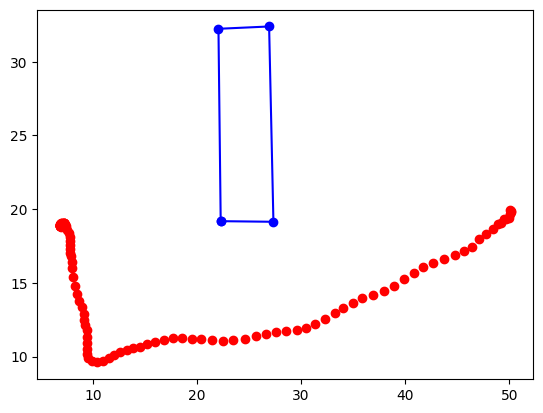

In [144]:

obstacle_x = [test['gt_obstacleTL_x_cm'],test['gt_obstacleTR_x_cm'],test['gt_obstacleBR_x_cm'],test['gt_obstacleBL_x_cm']]
obstacle_y = [test['gt_obstacleTL_y_cm'],test['gt_obstacleTR_y_cm'],test['gt_obstacleBR_y_cm'],test['gt_obstacleBL_y_cm']]
plt.plot(obstacle_x + [obstacle_x[0]], obstacle_y + [obstacle_y[0]], marker='o', linestyle='-', color='blue', label='Polygon')
plt.scatter(test['nose_x_cm'], test['nose_y_cm'], color='red', label='Points to Check')

In [5]:
def check_trial_for_obstalce_cross(row): 
    """function checks if the trail trace crosses through the obsacle and returns boolean
    True is dose not cross through obstacle. False mean at least one point is inside the obstalce"""
    
    obstacle_x = [row['gt_obstacleTL_x_cm'],row['gt_obstacleTR_x_cm'],row['gt_obstacleBR_x_cm'],row['gt_obstacleBL_x_cm']]
    obstacle_y = [row['gt_obstacleTL_y_cm'],row['gt_obstacleTR_y_cm'],row['gt_obstacleBR_y_cm'],row['gt_obstacleBL_y_cm']]
    nose_x = row['nose_x_cm'].astype(float)
    nose_y = row['nose_y_cm'].astype(float)

    def are_points_inside_polygon(x_points, y_points, obstacle_x, obstacle_y):
        n = len(obstacle_x)
        results = []

        for x, y in zip(x_points, y_points):
            inside = False
            p1x, p1y = obstacle_x[0], obstacle_y[0]

            for i in range(n + 1):
                p2x, p2y = obstacle_x[i % n], obstacle_y[i % n]
                if y > min(p1y, p2y):
                    if y <= max(p1y, p2y):
                        if x <= max(p1x, p2x):
                            if p1y != p2y:
                                xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                            if p1x == p2x or x <= xinters:
                                inside = not inside
                p1x, p1y = p2x, p2y

            results.append(inside)
        return results
    results = are_points_inside_polygon(nose_x,nose_y,obstacle_x,obstacle_y)
    if sum(results) == 0:
        return True  
    else:
        return False

    
      

In [186]:
obstacle_x

[22.268369270039628, 27.33486899191685, 26.92061965802164, 22.053963452874875]

In [66]:
row['nose_x_cm'].astype(float)

array([ 6.45732737,  6.35843171,  6.31720367,  6.29304831,  6.32918107,
        6.2540904 ,  6.25300255,  6.24551645,  6.34589639,  6.32143088,
        6.24874036,  6.24580853,  6.260744  ,  6.3011856 ,  6.23141815,
        6.23819068,  6.30674668,  6.2903829 ,  6.23804493,  6.29260174,
        6.2662392 ,  6.29299059,  6.24114524,  6.3283888 ,  6.24780408,
        6.20968043,  6.207064  ,  6.28272424,  6.28989087,  6.27255001,
        6.31273335,  6.28932071,  6.27097245,  6.27718473,  6.28592599,
        6.18528313,  6.24171307,  6.24118488,  6.24836666,  6.25637045,
        6.34321816,  6.62827402,  7.15836273,  7.70512128,  8.48626447,
        9.34987075,  9.82951502, 10.522964  , 10.89918341, 11.33395773,
       11.67129443, 12.12258468, 12.50458029, 13.03597022, 13.524217  ,
       14.29816558, 14.99729283, 15.78681525, 16.46986031, 17.17335178,
       17.98165445, 18.62284591, 19.36281003, 20.07736257, 20.79191511,
       21.50646765, 22.2210202 , 22.93557274, 23.9016472 , 24.90

In [145]:
check_trial_for_obstalce_cross(test)

True

In [150]:
copy = df.copy(deep=True)
copy.iloc[0].name

0

In [182]:
ind_to_drop

[]

In [184]:
row

level_0                                                                         0
index                                                                           0
first_poke                                                           60956.057548
second_poke                                                          60958.986316
trial_timestamps                [60956.064755, 60956.081574, 60956.098918, 609...
                                                      ...                        
mean_mean_gt_obstacleTR_y_cm                                                  NaN
mean_mean_gt_obstacleBR_x_cm                                                  NaN
mean_mean_gt_obstacleBR_y_cm                                                  NaN
mean_mean_gt_obstacleBL_x_cm                                                  NaN
mean_mean_gt_obstacleBL_y_cm                                                  NaN
Name: 0, Length: 197, dtype: object

In [185]:
check_trial_for_obstalce_cross(row)

TypeError: 'list' object is not callable

In [9]:
copy = df.copy(deep=True)
ind_to_drop = []
for ind,row in df.iterrows():
    if check_trial_for_obstalce_cross(row) == False:
         ind_to_drop.append(ind)



In [11]:
copy.drop(index=ind_to_drop,inplace=True)

In [10]:
len(ind_to_drop)

1842

In [170]:
ind_to_dropcopy = df.copy(deep=True)

In [12]:
copy

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,60956.057548,60958.986316,"[60956.064755, 60956.081574, 60956.098918, 609...","[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...","[98.219970703125, 98.28543853759766, 97.297500...","[258.87322998046875, 258.2541198730469, 257.01...","[107.9310073852539, 107.84115600585938, 107.66...","[266.6334533691406, 266.1789245605469, 265.581...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,60965.491417,60967.347059,"[60965.501145, 60965.518067, 60965.535436, 609...","[640, 641, 642, 643, 644, 645, 646, 647, 648, ...","[96.29674530029297, 95.56669616699219, 95.6471...","[254.7836456298828, 254.9083709716797, 255.394...","[101.49925231933594, 100.67830657958984, 100.9...","[262.8636169433594, 263.4535217285156, 263.921...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,60967.347059,60970.579136,"[60967.352576, 60967.368652, 60967.385523, 609...","[[751, 752, 753, 754, 755, 756, 757, 758, 759,...","[675.3671875, 676.18701171875, 676.38055419921...","[267.5236511230469, 267.6513671875, 268.050109...","[667.2891235351562, 669.3956298828125, 669.599...","[254.7681121826172, 253.37440490722656, 253.36...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,60970.579136,60972.869043,"[60970.586316, 60970.603212, 60970.621478, 609...","[945, 946, 947, 948, 949, 950, 951, 952, 953, ...","[94.26691436767578, 92.74860382080078, 91.8231...","[253.4375762939453, 254.07521057128906, 254.41...","[110.97284698486328, 109.15727996826172, 107.8...","[249.62869262695312, 249.5487060546875, 249.75...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,60972.869043,60977.817254,"[60972.871219, 60972.887488, 60972.904, 60972....","[[1082, 1083, 1084, 1085, 1086, 1087, 1088, 10...","[675.0545043945312, 676.9961547851562, 677.639...","[267.2052917480469, 265.7681579589844, 265.318...","[668.0994873046875, 668.9031982421875, 669.953...","[251.82919311523438, 251.80653381347656, 250.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,117,121,41656.259571,41658.328268,"[41656.262784, 41656.279372, 41656.296921, 416...","[[17323, 17324, 17325, 17326, 17327, 17328, 17...","[663.495849609375, 664.8201904296875, 665.9396...","[264.89837646484375, 265.54156494140625, 265.8...","[655.5112915039062, 656.9105224609375, 658.145...","[251.44400024414062, 252.0143280029297, 251.90...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18767,118,122,41658.328268,41661.498713,"[41658.330163, 41658.347379, 41658.363673, 416...","[17447, 17448, 17449, 17450, 17451, 17452, 174...","[79.43203735351562, 78.3126449584961, 77.73419...","[253.1162109375, 253.1206817626953, 252.876266...","[98.80210876464844, 97.23664093017578, 96.3384...","[248.8653106689453, 249.73953247070312, 249.97...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18768,119,123,41661.498713,41663.505932,"[41661.514457, 41661.531404, 41661.548057, 416...","[[17638, 17639, 17640, 17641, 17642, 17643, 17...","[665.4390869140625, 665.7069091796875, 664.964...","[265.40057373046875, 265.3721618652344, 265.77...","[656.1515502929688, 656.332763671875, 656.9799...","[251.6207275390625, 251.34507751464844, 251.37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18769,120,124,41663.505932,41665.877888,"[41663.515033, 41663.532787, 41663.548774, 416...","[17758, 17759, 17760, 17761, 17762, 17763, 177...","[79.8014144897461, 79.39984893798828, 79.16961...","[255.52340698242188, 255.8111572265625, 256.64...","[96.87207794189453, 95.72206115722656, 96.0115...","[252.80593872070312, 252.98394775390625, 252.9...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,60956.057548,60958.986316,"[60956.064755, 60956.081574, 60956.098918, 609...","[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...","[98.219970703125, 98.28543853759766, 97.297500...","[258.87322998046875, 258.2541198730469, 257.01...","[107.9310073852539, 107.84115600585938, 107.66...","[266.6334533691406, 266.1789245605469, 265.581...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,60965.491417,60967.347059,"[60965.501145, 60965.518067, 60965.535436, 609...","[640, 641, 642, 643, 644, 645, 646, 647, 648, ...","[96.29674530029297, 95.56669616699219, 95.6471...","[254.7836456298828, 254.9083709716797, 255.394...","[101.49925231933594, 100.67830657958984, 100.9...","[262.8636169433594, 263.4535217285156, 263.921...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,60967.347059,60970.579136,"[60967.352576, 60967.368652, 60967.385523, 609...","[[751, 752, 753, 754, 755, 756, 757, 758, 759,...","[675.3671875, 676.18701171875, 676.38055419921...","[267.5236511230469, 267.6513671875, 268.050109...","[667.2891235351562, 669.3956298828125, 669.599...","[254.7681121826172, 253.37440490722656, 253.36...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,60970.579136,60972.869043,"[60970.586316, 60970.603212, 60970.621478, 609...","[945, 946, 947, 948, 949, 950, 951, 952, 953, ...","[94.26691436767578, 92.74860382080078, 91.8231...","[253.4375762939453, 254.07521057128906, 254.41...","[110.97284698486328, 109.15727996826172, 107.8...","[249.62869262695312, 249.5487060546875, 249.75...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,60972.869043,60977.817254,"[60972.871219, 60972.887488, 60972.904, 60972....","[[1082, 1083, 1084, 1085, 1086, 1087, 1088, 10...","[675.0545043945312, 676.9961547851562, 677.639...","[267.2052917480469, 265.7681579589844, 265.318...","[668.0994873046875, 668.9031982421875, 669.953...","[251.82919311523438, 251.80653381347656, 250.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,117,121,41656.259571,41658.328268,"[41656.262784, 41656.279372, 41656.296921, 416...","[[17323, 17324, 17325, 17326, 17327, 17328, 17...","[663.495849609375, 664.8201904296875, 665.9396...","[264.89837646484375, 265.54156494140625, 265.8...","[655.5112915039062, 656.9105224609375, 658.145...","[251.44400024414062, 252.0143280029297, 251.90...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18767,118,122,41658.328268,41661.498713,"[41658.330163, 41658.347379, 41658.363673, 416...","[17447, 17448, 17449, 17450, 17451, 17452, 174...","[79.43203735351562, 78.3126449584961, 77.73419...","[253.1162109375, 253.1206817626953, 252.876266...","[98.80210876464844, 97.23664093017578, 96.3384...","[248.8653106689453, 249.73953247070312, 249.97...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18768,119,123,41661.498713,41663.505932,"[41661.514457, 41661.531404, 41661.548057, 416...","[[17638, 17639, 17640, 17641, 17642, 17643, 17...","[665.4390869140625, 665.7069091796875, 664.964...","[265.40057373046875, 265.3721618652344, 265.77...","[656.1515502929688, 656.332763671875, 656.9799...","[251.6207275390625, 251.34507751464844, 251.37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18769,120,124,41663.505932,41665.877888,"[41663.515033, 41663.532787, 41663.548774, 416...","[17758, 17759, 17760, 17761, 17762, 17763, 177...","[79.8014144897461, 79.39984893798828, 79.16961...","[255.52340698242188, 255.8111572265625, 256.64...","[96.87207794189453, 95.72206115722656, 96.0115...","[252.80593872070312, 252.98394775390625, 252.9...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [171]:
copy.iloc[ind]

level_0                                                                        11
index                                                                          12
first_poke                                                            45332.16791
second_poke                                                          45334.449561
trial_timestamps                [45332.180339, 45332.197312, 45332.214592, 453...
                                                      ...                        
mean_mean_gt_obstacleTR_y_cm                                                  NaN
mean_mean_gt_obstacleBR_x_cm                                                  NaN
mean_mean_gt_obstacleBR_y_cm                                                  NaN
mean_mean_gt_obstacleBL_x_cm                                                  NaN
mean_mean_gt_obstacleBL_y_cm                                                  NaN
Name: 17101, Length: 197, dtype: object

In [166]:
df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,60956.057548,60958.986316,"[60956.064755, 60956.081574, 60956.098918, 609...","[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...","[98.219970703125, 98.28543853759766, 97.297500...","[258.87322998046875, 258.2541198730469, 257.01...","[107.9310073852539, 107.84115600585938, 107.66...","[266.6334533691406, 266.1789245605469, 265.581...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,60965.491417,60967.347059,"[60965.501145, 60965.518067, 60965.535436, 609...","[640, 641, 642, 643, 644, 645, 646, 647, 648, ...","[96.29674530029297, 95.56669616699219, 95.6471...","[254.7836456298828, 254.9083709716797, 255.394...","[101.49925231933594, 100.67830657958984, 100.9...","[262.8636169433594, 263.4535217285156, 263.921...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,60967.347059,60970.579136,"[60967.352576, 60967.368652, 60967.385523, 609...","[[751, 752, 753, 754, 755, 756, 757, 758, 759,...","[675.3671875, 676.18701171875, 676.38055419921...","[267.5236511230469, 267.6513671875, 268.050109...","[667.2891235351562, 669.3956298828125, 669.599...","[254.7681121826172, 253.37440490722656, 253.36...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,60970.579136,60972.869043,"[60970.586316, 60970.603212, 60970.621478, 609...","[945, 946, 947, 948, 949, 950, 951, 952, 953, ...","[94.26691436767578, 92.74860382080078, 91.8231...","[253.4375762939453, 254.07521057128906, 254.41...","[110.97284698486328, 109.15727996826172, 107.8...","[249.62869262695312, 249.5487060546875, 249.75...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,60972.869043,60977.817254,"[60972.871219, 60972.887488, 60972.904, 60972....","[[1082, 1083, 1084, 1085, 1086, 1087, 1088, 10...","[675.0545043945312, 676.9961547851562, 677.639...","[267.2052917480469, 265.7681579589844, 265.318...","[668.0994873046875, 668.9031982421875, 669.953...","[251.82919311523438, 251.80653381347656, 250.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,117,121,41656.259571,41658.328268,"[41656.262784, 41656.279372, 41656.296921, 416...","[[17323, 17324, 17325, 17326, 17327, 17328, 17...","[663.495849609375, 664.8201904296875, 665.9396...","[264.89837646484375, 265.54156494140625, 265.8...","[655.5112915039062, 656.9105224609375, 658.145...","[251.44400024414062, 252.0143280029297, 251.90...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18767,118,122,41658.328268,41661.498713,"[41658.330163, 41658.347379, 41658.363673, 416...","[17447, 17448, 17449, 17450, 17451, 17452, 174...","[79.43203735351562, 78.3126449584961, 77.73419...","[253.1162109375, 253.1206817626953, 252.876266...","[98.80210876464844, 97.23664093017578, 96.3384...","[248.8653106689453, 249.73953247070312, 249.97...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18768,119,123,41661.498713,41663.505932,"[41661.514457, 41661.531404, 41661.548057, 416...","[[17638, 17639, 17640, 17641, 17642, 17643, 17...","[665.4390869140625, 665.7069091796875, 664.964...","[265.40057373046875, 265.3721618652344, 265.77...","[656.1515502929688, 656.332763671875, 656.9799...","[251.6207275390625, 251.34507751464844, 251.37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18769,120,124,41663.505932,41665.877888,"[41663.515033, 41663.532787, 41663.548774, 416...","[17758, 17759, 17760, 17761, 17762, 17763, 177...","[79.8014144897461, 79.39984893798828, 79.16961...","[255.52340698242188, 255.8111572265625, 256.64...","[96.87207794189453, 95.72206115722656, 96.0115...","[252.80593872070312, 252.98394775390625, 252.9...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [164]:
copy

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,60956.057548,60958.986316,"[60956.064755, 60956.081574, 60956.098918, 609...","[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...","[98.219970703125, 98.28543853759766, 97.297500...","[258.87322998046875, 258.2541198730469, 257.01...","[107.9310073852539, 107.84115600585938, 107.66...","[266.6334533691406, 266.1789245605469, 265.581...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,60965.491417,60967.347059,"[60965.501145, 60965.518067, 60965.535436, 609...","[640, 641, 642, 643, 644, 645, 646, 647, 648, ...","[96.29674530029297, 95.56669616699219, 95.6471...","[254.7836456298828, 254.9083709716797, 255.394...","[101.49925231933594, 100.67830657958984, 100.9...","[262.8636169433594, 263.4535217285156, 263.921...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,60967.347059,60970.579136,"[60967.352576, 60967.368652, 60967.385523, 609...","[[751, 752, 753, 754, 755, 756, 757, 758, 759,...","[675.3671875, 676.18701171875, 676.38055419921...","[267.5236511230469, 267.6513671875, 268.050109...","[667.2891235351562, 669.3956298828125, 669.599...","[254.7681121826172, 253.37440490722656, 253.36...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,60970.579136,60972.869043,"[60970.586316, 60970.603212, 60970.621478, 609...","[945, 946, 947, 948, 949, 950, 951, 952, 953, ...","[94.26691436767578, 92.74860382080078, 91.8231...","[253.4375762939453, 254.07521057128906, 254.41...","[110.97284698486328, 109.15727996826172, 107.8...","[249.62869262695312, 249.5487060546875, 249.75...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,60972.869043,60977.817254,"[60972.871219, 60972.887488, 60972.904, 60972....","[[1082, 1083, 1084, 1085, 1086, 1087, 1088, 10...","[675.0545043945312, 676.9961547851562, 677.639...","[267.2052917480469, 265.7681579589844, 265.318...","[668.0994873046875, 668.9031982421875, 669.953...","[251.82919311523438, 251.80653381347656, 250.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,117,121,41656.259571,41658.328268,"[41656.262784, 41656.279372, 41656.296921, 416...","[[17323, 17324, 17325, 17326, 17327, 17328, 17...","[663.495849609375, 664.8201904296875, 665.9396...","[264.89837646484375, 265.54156494140625, 265.8...","[655.5112915039062, 656.9105224609375, 658.145...","[251.44400024414062, 252.0143280029297, 251.90...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18767,118,122,41658.328268,41661.498713,"[41658.330163, 41658.347379, 41658.363673, 416...","[17447, 17448, 17449, 17450, 17451, 17452, 174...","[79.43203735351562, 78.3126449584961, 77.73419...","[253.1162109375, 253.1206817626953, 252.876266...","[98.80210876464844, 97.23664093017578, 96.3384...","[248.8653106689453, 249.73953247070312, 249.97...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18768,119,123,41661.498713,41663.505932,"[41661.514457, 41661.531404, 41661.548057, 416...","[[17638, 17639, 17640, 17641, 17642, 17643, 17...","[665.4390869140625, 665.7069091796875, 664.964...","[265.40057373046875, 265.3721618652344, 265.77...","[656.1515502929688, 656.332763671875, 656.9799...","[251.6207275390625, 251.34507751464844, 251.37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18769,120,124,41663.505932,41665.877888,"[41663.515033, 41663.532787, 41663.548774, 416...","[17758, 17759, 17760, 17761, 17762, 17763, 177...","[79.8014144897461, 79.39984893798828, 79.16961...","[255.52340698242188, 255.8111572265625, 256.64...","[96.87207794189453, 95.72206115722656, 96.0115...","[252.80593872070312, 252.98394775390625, 252.9...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

df

In [159]:
df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,60956.057548,60958.986316,"[60956.064755, 60956.081574, 60956.098918, 609...","[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...","[98.219970703125, 98.28543853759766, 97.297500...","[258.87322998046875, 258.2541198730469, 257.01...","[107.9310073852539, 107.84115600585938, 107.66...","[266.6334533691406, 266.1789245605469, 265.581...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,60965.491417,60967.347059,"[60965.501145, 60965.518067, 60965.535436, 609...","[640, 641, 642, 643, 644, 645, 646, 647, 648, ...","[96.29674530029297, 95.56669616699219, 95.6471...","[254.7836456298828, 254.9083709716797, 255.394...","[101.49925231933594, 100.67830657958984, 100.9...","[262.8636169433594, 263.4535217285156, 263.921...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,60967.347059,60970.579136,"[60967.352576, 60967.368652, 60967.385523, 609...","[[751, 752, 753, 754, 755, 756, 757, 758, 759,...","[675.3671875, 676.18701171875, 676.38055419921...","[267.5236511230469, 267.6513671875, 268.050109...","[667.2891235351562, 669.3956298828125, 669.599...","[254.7681121826172, 253.37440490722656, 253.36...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,60970.579136,60972.869043,"[60970.586316, 60970.603212, 60970.621478, 609...","[945, 946, 947, 948, 949, 950, 951, 952, 953, ...","[94.26691436767578, 92.74860382080078, 91.8231...","[253.4375762939453, 254.07521057128906, 254.41...","[110.97284698486328, 109.15727996826172, 107.8...","[249.62869262695312, 249.5487060546875, 249.75...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,60972.869043,60977.817254,"[60972.871219, 60972.887488, 60972.904, 60972....","[[1082, 1083, 1084, 1085, 1086, 1087, 1088, 10...","[675.0545043945312, 676.9961547851562, 677.639...","[267.2052917480469, 265.7681579589844, 265.318...","[668.0994873046875, 668.9031982421875, 669.953...","[251.82919311523438, 251.80653381347656, 250.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,117,121,41656.259571,41658.328268,"[41656.262784, 41656.279372, 41656.296921, 416...","[[17323, 17324, 17325, 17326, 17327, 17328, 17...","[663.495849609375, 664.8201904296875, 665.9396...","[264.89837646484375, 265.54156494140625, 265.8...","[655.5112915039062, 656.9105224609375, 658.145...","[251.44400024414062, 252.0143280029297, 251.90...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18767,118,122,41658.328268,41661.498713,"[41658.330163, 41658.347379, 41658.363673, 416...","[17447, 17448, 17449, 17450, 17451, 17452, 174...","[79.43203735351562, 78.3126449584961, 77.73419...","[253.1162109375, 253.1206817626953, 252.876266...","[98.80210876464844, 97.23664093017578, 96.3384...","[248.8653106689453, 249.73953247070312, 249.97...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18768,119,123,41661.498713,41663.505932,"[41661.514457, 41661.531404, 41661.548057, 416...","[[17638, 17639, 17640, 17641, 17642, 17643, 17...","[665.4390869140625, 665.7069091796875, 664.964...","[265.40057373046875, 265.3721618652344, 265.77...","[656.1515502929688, 656.332763671875, 656.9799...","[251.6207275390625, 251.34507751464844, 251.37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18769,120,124,41663.505932,41665.877888,"[41663.515033, 41663.532787, 41663.548774, 416...","[17758, 17759, 17760, 17761, 17762, 17763, 177...","[79.8014144897461, 79.39984893798828, 79.16961...","[255.52340698242188, 255.8111572265625, 256.64...","[96.87207794189453, 95.72206115722656, 96.0115...","[252.80593872070312, 252.98394775390625, 252.9...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [161]:
copy.iloc[ind]

IndexError: single positional indexer is out-of-bounds

In [153]:
df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mean_mean_gt_obstacleBL_x,mean_mean_gt_obstacleBL_y,mean_mean_gt_obstacleTL_x_cm,mean_mean_gt_obstacleTL_y_cm,mean_mean_gt_obstacleTR_x_cm,mean_mean_gt_obstacleTR_y_cm,mean_mean_gt_obstacleBR_x_cm,mean_mean_gt_obstacleBR_y_cm,mean_mean_gt_obstacleBL_x_cm,mean_mean_gt_obstacleBL_y_cm
0,0,0,60956.057548,60958.986316,"[60956.064755, 60956.081574, 60956.098918, 609...","[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8...","[98.219970703125, 98.28543853759766, 97.297500...","[258.87322998046875, 258.2541198730469, 257.01...","[107.9310073852539, 107.84115600585938, 107.66...","[266.6334533691406, 266.1789245605469, 265.581...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,60965.491417,60967.347059,"[60965.501145, 60965.518067, 60965.535436, 609...","[640, 641, 642, 643, 644, 645, 646, 647, 648, ...","[96.29674530029297, 95.56669616699219, 95.6471...","[254.7836456298828, 254.9083709716797, 255.394...","[101.49925231933594, 100.67830657958984, 100.9...","[262.8636169433594, 263.4535217285156, 263.921...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,60967.347059,60970.579136,"[60967.352576, 60967.368652, 60967.385523, 609...","[[751, 752, 753, 754, 755, 756, 757, 758, 759,...","[675.3671875, 676.18701171875, 676.38055419921...","[267.5236511230469, 267.6513671875, 268.050109...","[667.2891235351562, 669.3956298828125, 669.599...","[254.7681121826172, 253.37440490722656, 253.36...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,60970.579136,60972.869043,"[60970.586316, 60970.603212, 60970.621478, 609...","[945, 946, 947, 948, 949, 950, 951, 952, 953, ...","[94.26691436767578, 92.74860382080078, 91.8231...","[253.4375762939453, 254.07521057128906, 254.41...","[110.97284698486328, 109.15727996826172, 107.8...","[249.62869262695312, 249.5487060546875, 249.75...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,60972.869043,60977.817254,"[60972.871219, 60972.887488, 60972.904, 60972....","[[1082, 1083, 1084, 1085, 1086, 1087, 1088, 10...","[675.0545043945312, 676.9961547851562, 677.639...","[267.2052917480469, 265.7681579589844, 265.318...","[668.0994873046875, 668.9031982421875, 669.953...","[251.82919311523438, 251.80653381347656, 250.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,117,121,41656.259571,41658.328268,"[41656.262784, 41656.279372, 41656.296921, 416...","[[17323, 17324, 17325, 17326, 17327, 17328, 17...","[663.495849609375, 664.8201904296875, 665.9396...","[264.89837646484375, 265.54156494140625, 265.8...","[655.5112915039062, 656.9105224609375, 658.145...","[251.44400024414062, 252.0143280029297, 251.90...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18767,118,122,41658.328268,41661.498713,"[41658.330163, 41658.347379, 41658.363673, 416...","[17447, 17448, 17449, 17450, 17451, 17452, 174...","[79.43203735351562, 78.3126449584961, 77.73419...","[253.1162109375, 253.1206817626953, 252.876266...","[98.80210876464844, 97.23664093017578, 96.3384...","[248.8653106689453, 249.73953247070312, 249.97...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18768,119,123,41661.498713,41663.505932,"[41661.514457, 41661.531404, 41661.548057, 416...","[[17638, 17639, 17640, 17641, 17642, 17643, 17...","[665.4390869140625, 665.7069091796875, 664.964...","[265.40057373046875, 265.3721618652344, 265.77...","[656.1515502929688, 656.332763671875, 656.9799...","[251.6207275390625, 251.34507751464844, 251.37...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18769,120,124,41663.505932,41665.877888,"[41663.515033, 41663.532787, 41663.548774, 416...","[17758, 17759, 17760, 17761, 17762, 17763, 177...","[79.8014144897461, 79.39984893798828, 79.16961...","[255.52340698242188, 255.8111572265625, 256.64...","[96.87207794189453, 95.72206115722656, 96.0115...","[252.80593872070312, 252.98394775390625, 252.9...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN